In [1]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

## keras内置方法实现独热编码
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)  
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 3s 402us/step - loss: 2.5334 - acc: 0.4959 - val_loss: 1.7253 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.4500 - acc: 0.6864 - val_loss: 1.3509 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0993 - acc: 0.7640 - val_loss: 1.1734 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.8718 - acc: 0.8153 - val_loss: 1.0846 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.7046 - acc: 0.8478 - val_loss: 0.9863 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.5682 - acc: 0.8791 - val_loss: 0.9408 - val_acc: 0.8040
Epoch 7/20
7982/7982 [============

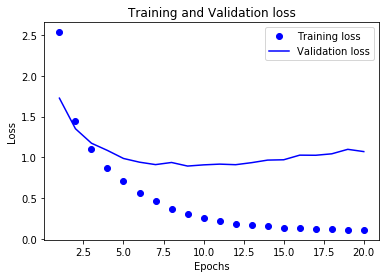

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend( )

plt.show( )

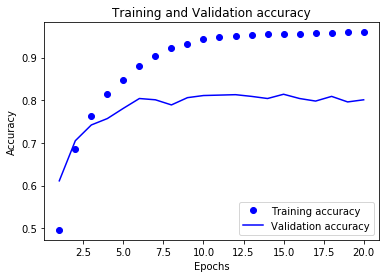

In [18]:
plt.clf( )

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend( )

plt.show( )


In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 284us/step - loss: 2.5405 - acc: 0.5223 - val_loss: 1.6795 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 142us/step - loss: 1.3791 - acc: 0.7100 - val_loss: 1.2821 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 1s 133us/step - loss: 1.0211 - acc: 0.7783 - val_loss: 1.1341 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.8026 - acc: 0.8241 - val_loss: 1.0553 - val_acc: 0.7560
Epoch 5/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.6426 - acc: 0.8621 - val_loss: 0.9781 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.5144 - acc: 0.8909 - val_loss: 0.9107 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.4136 - acc: 0.9141 - val_loss: 0.8925 - val_acc: 0.8210
Epoch 8

In [20]:
results

[1.023594636526473, 0.7764915405695499]

In [21]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
#统计hits_array中的值为（true和false）
float(np.sum(hits_array)) / len(test_labels)
#np.sum(hits_array)会统计hits_array中为true的个数

0.182546749777382

In [23]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

## 处理标签和损失的另一种方法
y_train = np.array(train_labels)  
y_test = np.array(test_labels)  

model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics ='acc' )  
这个新的损失函数在数学上与categorical_crossentropy完全相同，二者只是接口不同。  sparse_categorical_crossentropy是对整数标签使用的 

## 具有信息瓶颈的模型

In [26]:
model = models.Sequential( )
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test,y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 289us/step - loss: 3.3942 - acc: 0.2021 - val_loss: 3.0209 - val_acc: 0.2310
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 2.7395 - acc: 0.2511 - val_loss: 2.5116 - val_acc: 0.3700
Epoch 3/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.2367 - acc: 0.5236 - val_loss: 2.1431 - val_acc: 0.5550
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.8694 - acc: 0.5700 - val_loss: 1.8654 - val_acc: 0.5600
Epoch 5/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.6117 - acc: 0.5763 - val_loss: 1.6915 - val_acc: 0.5660
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4321 - acc: 0.5893 - val_loss: 1.5826 - val_acc: 0.5760
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.2967 - acc: 0.6298 - val_loss: 1.4936 - val_acc: 0.6250


In [27]:
results

[1.5379016626549955, 0.6727515583524508]

## 正则化

from keras import regularizers  
regularizers.l1(0.001)&nbsp;  #L1正则化    
regularizers.l1_l2(l1=0.001, l2=0.001) &nbsp; #同时做L1和L2正则化

## Dropout
在 Keras 中，你可以通过 Dropout 层向网络中引入 dropout，dropout 将被应用于<font color='red'>前面一层的输出</font>。 

<font size = 4>model.add(layers.Dropout(0.5))</font>